1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

n = 1000
x1 = np.random.normal(loc=0,scale=1,size=n)
x2 = x1 + np.random.normal(loc=0,scale=3,size=n)
x3 = 2*x1 + x2

A = np.array([x1,x2,x3]) #columns = number of observations (n), rows = number of features (3)

#let's scale the data subtracting its mean along the first axis (rows of each column)
#A = A - A.mean(axis = 1, keepdims = True)
#print("scaled data:",A)

print("A shape:",A.shape)

C = np.cov(A)
print("\nCovariance matrix:\n", C, '\n')

print("\nEIGENDECOMPOSITION OF THE COVARIANCE MATRIX:\n")

# now find the eigenvectors of the covariance matrix
l, V = la.eig(C)
# take only the real component, if possible
l = np.real_if_close(l)
Lambda = np.diag(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

decreasing_order = np.argsort(l)[::-1] #return the indeces that would sort the eigenvalues array
l = l[decreasing_order]
V = V[:, decreasing_order] #sort the eigenvectors according to the eigenvalues

print("Eigenvalues sorted:\n",l,"\n")
print("Eigenvectors sorted:\n",V,"\n")

#print("are eigenvectors orthogonal to each other?",(np.allclose(np.dot(V[:,0],V[:,1]),0),np.allclose(np.dot(V[:,1],V[:,2]),0),np.allclose(np.dot(V[:,0],V[:,2]),0)))
res = np.dot(V[:,0],V[:,1])
print("\nSVD ON THE COVARIANCE MATRIX:\n")

# perform the SVD
U, S, Vt = la.svd(C)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", S, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

#let's calculate the explained variances for every principal component
explained_variances = []
for li in l:
    explained_variances.append(li/Lambda.trace())
print("Total variability retained for each principal component respectively (%):\n",*(np.dot(explained_variances,100)),"\n")

print("Projecing data to 1st and 2nd pc results on retaining ",np.dot(explained_variances[0] + explained_variances[1],100) ,"% of total variability")
print("Projecing data to 2nd and 3rd pc results on retaining ",np.dot(explained_variances[1] + explained_variances[2],100) ,"% of total variability")
print("Projecing data to 1st and 3rd pc results on retaining ",np.dot(explained_variances[0] + explained_variances[2],100) ,"% of total variability")


A shape: (3, 1000)

Covariance matrix:
 [[ 1.01498159  1.22122674  3.25118992]
 [ 1.22122674  9.93299487 12.37544836]
 [ 3.25118992 12.37544836 18.87782819]] 


EIGENDECOMPOSITION OF THE COVARIANCE MATRIX:

Eigenvalues:
 [ 2.79839460e+01 -2.06894611e-16  1.84185865e+00] 

Eigenvectors:
 [[-0.12385616 -0.81649658  0.56390867]
 [-0.56678809 -0.40824829 -0.71560086]
 [-0.81450041  0.40824829  0.41221648]] 

Eigenvalues sorted:
 [ 2.79839460e+01  1.84185865e+00 -2.06894611e-16] 

Eigenvectors sorted:
 [[-0.12385616  0.56390867 -0.81649658]
 [-0.56678809 -0.71560086 -0.40824829]
 [-0.81450041  0.41221648  0.40824829]] 


SVD ON THE COVARIANCE MATRIX:

shapes: U = (3, 3) D: (3,) V^T: (3, 3) 

Spectrum:
 [2.79839460e+01 1.84185865e+00 1.03782510e-15] 

U:
 [[-0.12385616  0.56390867 -0.81649658]
 [-0.56678809 -0.71560086 -0.40824829]
 [-0.81450041  0.41221648  0.40824829]] 

V^T:
 [[-0.12385616 -0.56678809 -0.81450041]
 [ 0.56390867 -0.71560086  0.41221648]
 [ 0.81649658  0.40824829 -0.4082482

projected data shape: (3, 1000)
projected data:
 [[-1.08700364e+01 -2.68619193e+00 -8.05312245e+00 ... -4.08237627e+00
  -6.92874848e+00  7.46180181e+00]
 [-1.18147013e+00 -1.42238267e+00  2.15267386e+00 ...  1.49486538e+00
  -1.31616517e+00 -1.96573982e+00]
 [-8.23409491e-16 -9.12098674e-16  2.18413674e-15 ...  1.22297263e-15
  -6.00964179e-16 -1.46414159e-15]]


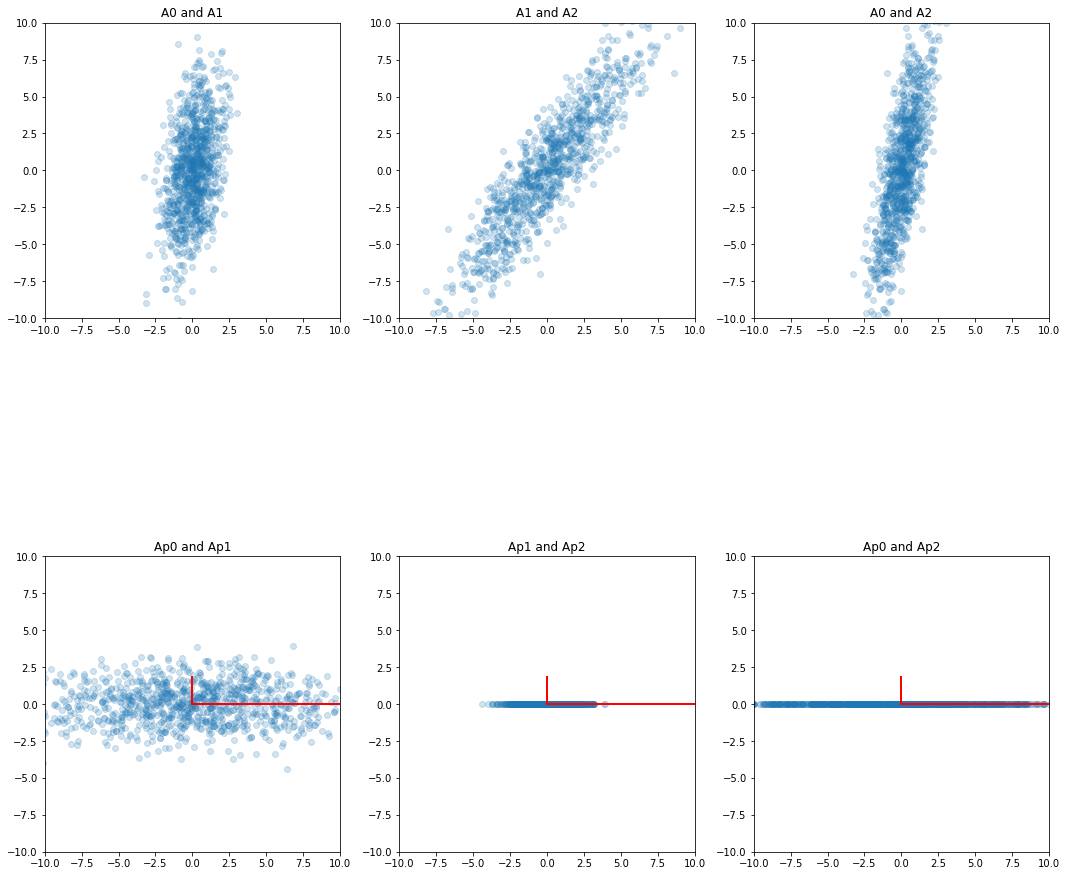

In [2]:
#setting up all plots
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18,18))
axis_limits = [-10,10,-10,10]
scale_factor = 1 #just for plotting

#plotting original data
ax1.axis(axis_limits)
ax1.set_aspect('equal')
ax1.set_title('A0 and A1')
ax1.scatter(A[0,:],A[1,:],alpha=0.2)

ax2.axis(axis_limits)
ax2.set_aspect('equal')
ax2.set_title('A1 and A2')
ax2.scatter(A[1,:],A[2,:],alpha=0.2)

ax3.axis(axis_limits)
ax3.set_aspect('equal')
ax3.set_title('A0 and A2')
ax3.scatter(A[0,:],A[2,:],alpha=0.2)


#setting up the projections of original data to its 3 principal components

Ap = np.dot(V.T,A)
print("projected data shape:",Ap.shape)
print("projected data:\n",Ap)


#plotting projected data

ax4.axis(axis_limits)
ax4.set_aspect('equal')
ax4.set_title('Ap0 and Ap1')
ax4.scatter(Ap[0,:],Ap[1,:],alpha=0.2)
for li, vi in zip(l,np.diag([1]*(len(l)-1))): #using a diagonal matrix of all ones to plot the new basis
    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax5.axis(axis_limits)
ax5.set_aspect('equal')
ax5.set_title('Ap1 and Ap2')
ax5.scatter(Ap[1,:],Ap[2,:],alpha=0.2)
for li, vi in zip(l,np.diag([1]*(len(l)-1))): #using a diagonal matrix of all ones to plot the new basis
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax6.axis(axis_limits)
ax6.set_aspect('equal')
ax6.set_title('Ap0 and Ap2')
ax6.scatter(Ap[0,:],Ap[2,:],alpha=0.2)
for li, vi in zip(l,np.diag([1]*(len(l)-1))): #using a diagonal matrix of all ones to plot the new basis
    ax6.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [3]:
#define the noise matrix composed by 10 column ad n rows
sigma = 1/20

N = np.random.normal(loc=0,scale=sigma,size=(n,10)) #create nx10 noise matrix

#concatenate this matrix to the right of the matrix containing original data
old_A = A
A = np.hstack((A.T,N))
A = A.T

print("Original data matrix shape:",old_A.shape)
print("Random noise matrix shape:",N.shape)
print("Original data matrix with added noise uncorrelated variables shape:",A.shape)

Original data matrix shape: (3, 1000)
Random noise matrix shape: (1000, 10)
Original data matrix with added noise uncorrelated variables shape: (13, 1000)


In [14]:
#covariances matrix
C = np.cov(A)
print("\nCovariance matrix shape:\n", C.shape, '\n')
#print("\nCovariance matrix:\n", C, '\n')

print("\nEIGENDECOMPOSITION OF THE COVARIANCE MATRIX:\n")

# now find the eigenvectors of the covariance matrix
l, V = la.eig(C)
# take only the real component, if possible
l = np.real_if_close(l)
Lambda = np.diag(l)

print("Eigenvalues shape:\n", l.shape, '\n')
print("Eigenvectors shape:\n", V.shape, '\n')

decreasing_order = np.argsort(l)[::-1] #return the indeces that would sort the eigenvalues array
l = l[decreasing_order]
V = V[:, decreasing_order] #sort the eigenvectors according to the eigenvalues

print("Eigenvalues have been sorted\n")
print("Eigenvectors have been sorted\n")

#print("are eigenvectors orthogonal to each other?",(np.allclose(np.dot(V[:,0],V[:,1]),0),np.allclose(np.dot(V[:,1],V[:,2]),0),np.allclose(np.dot(V[:,0],V[:,2]),0)))
res = np.dot(V[:,0],V[:,1])
print("\nSVD ON THE COVARIANCE MATRIX:\n")

# perform the SVD
U, S, Vt = la.svd(C)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
#print("Spectrum:\n", S, '\n')
#print("U:\n", U, '\n')
#print("V^T:\n", Vt, '\n')

#let's calculate the explained variances for every principal component
explained_variances = []
for li in l:
    explained_variances.append(li/Lambda.trace())
print("Total variability retained for each principal component respectively (%):\n",*(np.dot(explained_variances,100)),"\n")

print("Projecing data to 1st and 2nd pc results on retaining ",np.dot(explained_variances[0] + explained_variances[1],100) ,"% of total variability")
print("Projecing data to 2nd and 3rd pc results on retaining ",np.dot(explained_variances[1] + explained_variances[2],100) ,"% of total variability")
print("Projecing data to 1st and 3rd pc results on retaining ",np.dot(explained_variances[0] + explained_variances[2],100) ,"% of total variability")

print("\nWe can observe that the results on the total variability retained are pretty the same as before because the added noise is not correlated to the three initial variables")


Covariance matrix shape:
 (13, 13) 


EIGENDECOMPOSITION OF THE COVARIANCE MATRIX:

Eigenvalues shape:
 (13,) 

Eigenvectors shape:
 (13, 13) 

Eigenvalues have been sorted

Eigenvectors have been sorted


SVD ON THE COVARIANCE MATRIX:

shapes: U = (13, 13) D: (13,) V^T: (13, 13) 

Total variability retained for each principal component respectively (%):
 93.74564241204314 6.170258146496802 0.00999320659475764 0.009285756999723326 0.009250770755738037 0.00903923314440453 0.008484454658540861 0.008380145091718756 0.007952340350501946 0.007623223276628176 0.007296133632459648 0.006794176955599191 -2.2390478837588046e-15 

Projecing data to 1st and 2nd pc results on retaining  99.91590055853993 % of total variability
Projecing data to 2nd and 3rd pc results on retaining  6.18025135309156 % of total variability
Projecing data to 1st and 3rd pc results on retaining  93.7556356186379 % of total variability

We can observe that the results on the total variability retained are pretty the sam

projected data shape: (13, 1000)
projected data:
 [[-1.08700264e+01 -2.68617906e+00 -8.05307611e+00 ... -4.08238426e+00
  -6.92880311e+00  7.46178094e+00]
 [ 1.18118000e+00  1.42188015e+00 -2.15258047e+00 ... -1.49486082e+00
   1.31628396e+00  1.96585829e+00]
 [ 3.17020204e-02  1.47649735e-01 -3.87099684e-02 ... -8.46828180e-02
   2.80747783e-02  6.32489290e-02]
 ...
 [ 4.15794813e-02  1.87548216e-02 -3.00653392e-02 ... -5.53896800e-02
   4.79778352e-02  4.16562867e-02]
 [-3.00048643e-02 -9.26127900e-02  3.48567459e-02 ... -1.28720348e-03
   2.83923441e-02 -2.30472494e-02]
 [-4.44089210e-16 -2.22044605e-16  0.00000000e+00 ...  0.00000000e+00
  -4.44089210e-16  0.00000000e+00]]


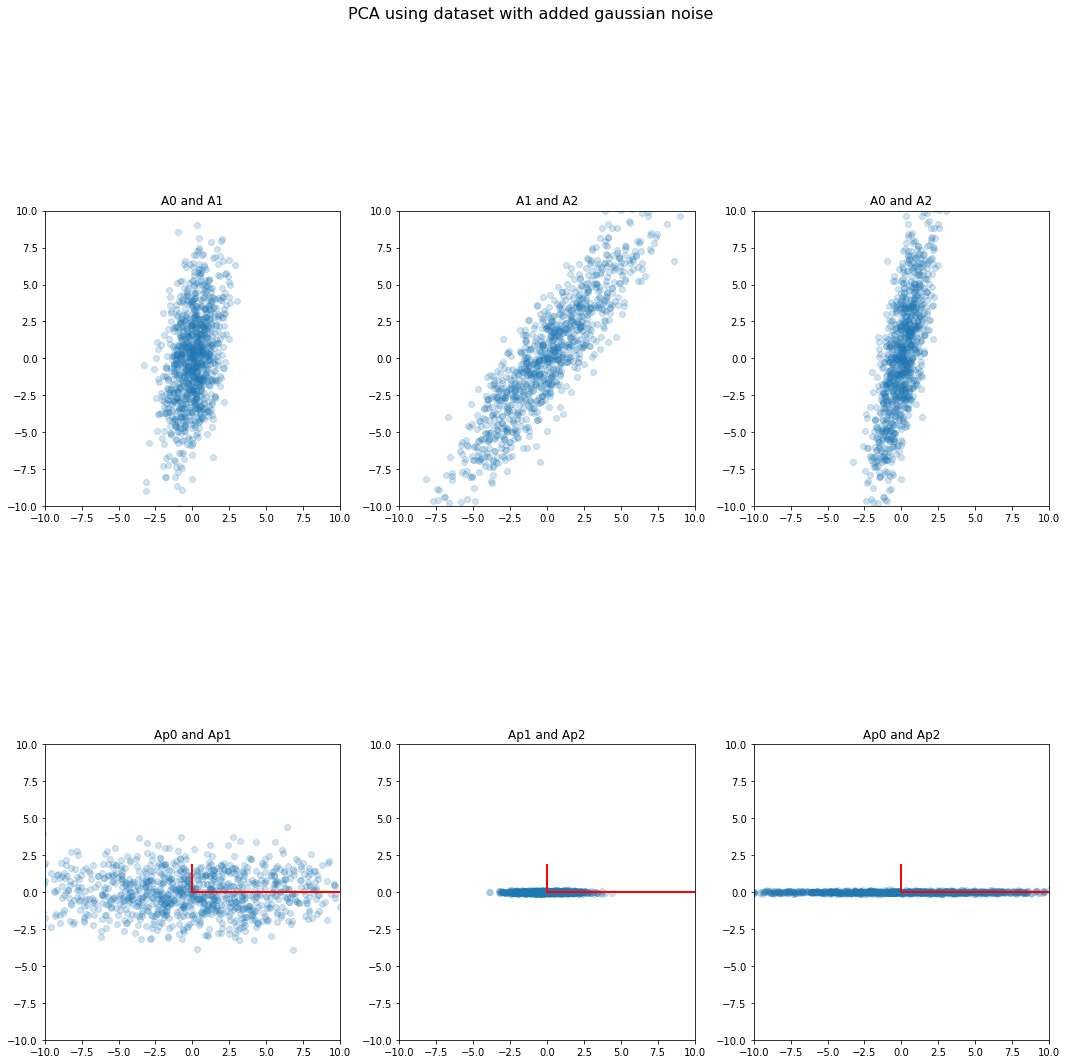

In [17]:
#setting up all plots
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18,18))
axis_limits = [-10,10,-10,10]
scale_factor = 1 #just for plotting
fig.suptitle('PCA using dataset with added gaussian noise', fontsize=16)

#plotting original data
ax1.axis(axis_limits)
ax1.set_aspect('equal')
ax1.set_title('A0 and A1')
ax1.scatter(A[0,:],A[1,:],alpha=0.2)

ax2.axis(axis_limits)
ax2.set_aspect('equal')
ax2.set_title('A1 and A2')
ax2.scatter(A[1,:],A[2,:],alpha=0.2)

ax3.axis(axis_limits)
ax3.set_aspect('equal')
ax3.set_title('A0 and A2')
ax3.scatter(A[0,:],A[2,:],alpha=0.2)


#setting up the projections of original data to its 3 principal components

Ap = np.dot(V.T,A)
print("projected data shape:",Ap.shape)
print("projected data:\n",Ap)


#plotting projected data

ax4.axis(axis_limits)
ax4.set_aspect('equal')
ax4.set_title('Ap0 and Ap1')
ax4.scatter(Ap[0,:],Ap[1,:],alpha=0.2)
for li, vi in zip(l,np.diag([1]*(len(l)-1))): #using a diagonal matrix of all ones to plot the new basis
    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax5.axis(axis_limits)
ax5.set_aspect('equal')
ax5.set_title('Ap1 and Ap2')
ax5.scatter(Ap[1,:],Ap[2,:],alpha=0.2)
for li, vi in zip(l,np.diag([1]*(len(l)-1))): #using a diagonal matrix of all ones to plot the new basis
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax6.axis(axis_limits)
ax6.set_aspect('equal')
ax6.set_title('Ap0 and Ap2')
ax6.scatter(Ap[0,:],Ap[2,:],alpha=0.2)
for li, vi in zip(l,np.diag([1]*(len(l)-1))): #using a diagonal matrix of all ones to plot the new basis
    ax6.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [6]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 
###TODO